In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
DATA_DIR = "../data"
TRAIN_FILE = os.path.join(DATA_DIR, "train.csv")
TEST_FILE = os.path.join(DATA_DIR, "test.csv")

In [3]:
train_df = pd.read_csv(TRAIN_FILE)
test_df = pd.read_csv(TEST_FILE)

In [4]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (891, 12)
Test shape: (418, 11)


In [5]:
train_df.head()
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


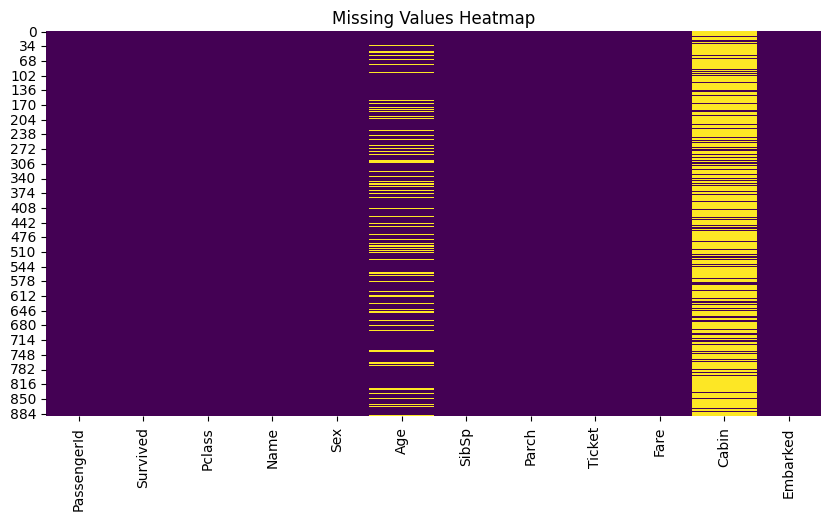

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
# Missing values count
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

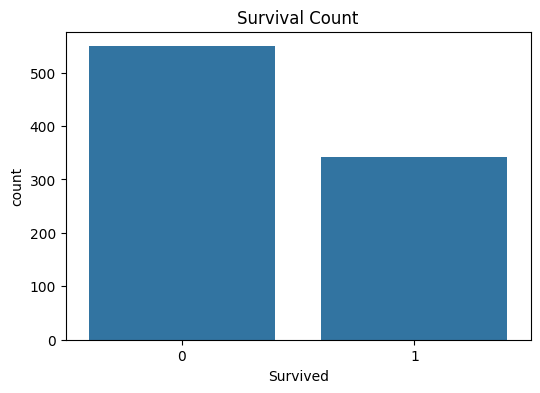

Survival value counts:
 Survived
0    549
1    342
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count")
plt.show()
# Target Distribution (Survival)
print("Survival value counts:\n", train_df["Survived"].value_counts())

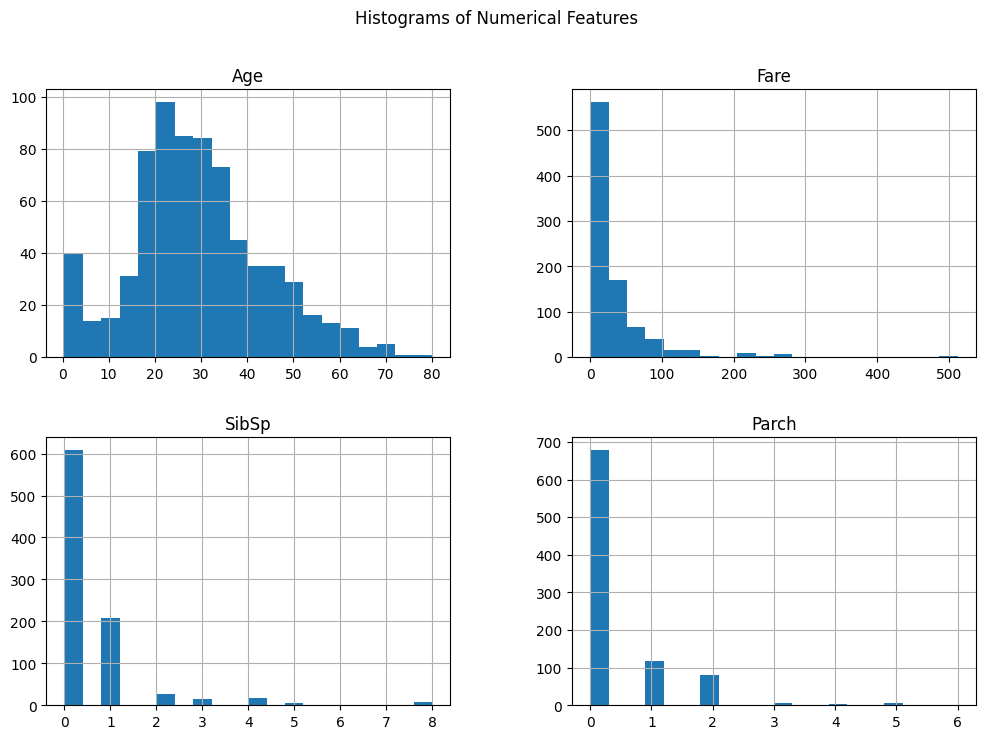

In [9]:
num_features = ["Age", "Fare", "SibSp", "Parch"]
train_df[num_features].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

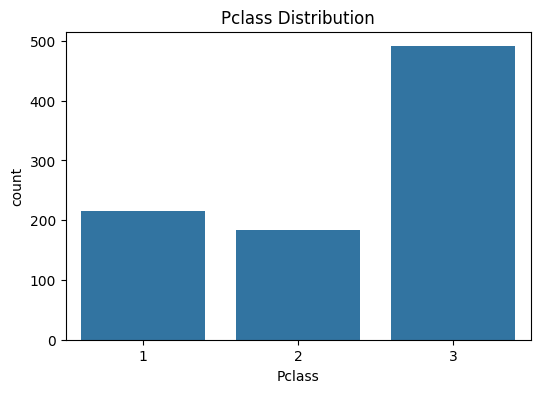

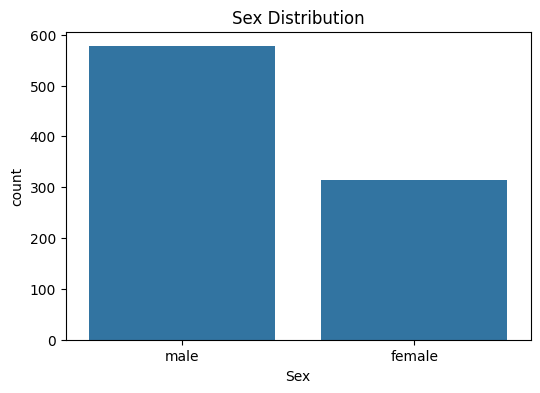

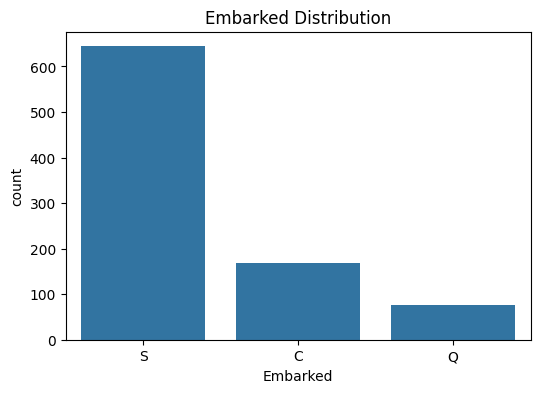

In [10]:
cat_features = ["Pclass", "Sex", "Embarked"]
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=train_df)
    plt.title(f"{col} Distribution")
    plt.show()

In [11]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 800x600 with 0 Axes>

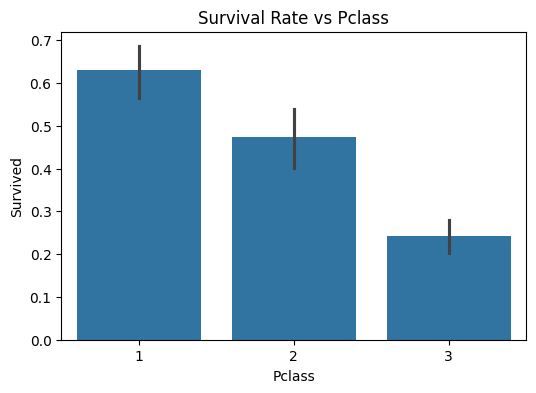

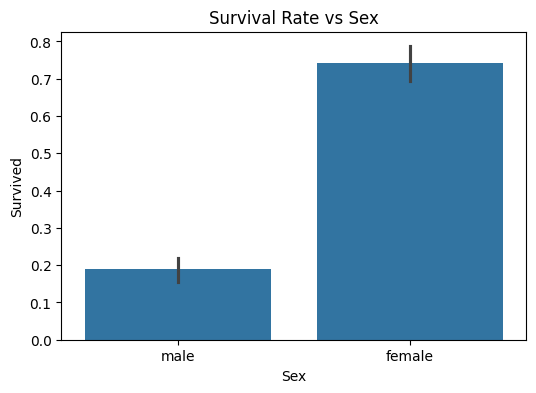

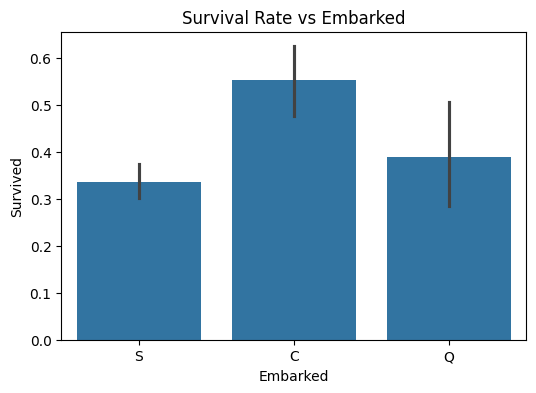

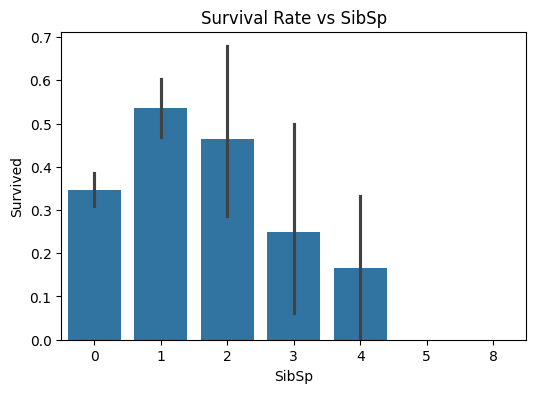

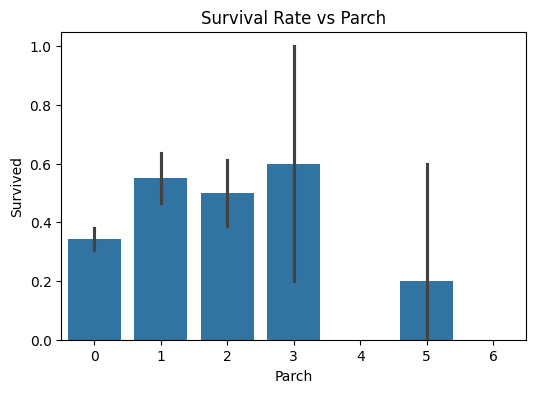

In [12]:
# survival rate vs categorical features
for col in ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="Survived", data=train_df)
    plt.title(f"Survival Rate vs {col}")
    plt.show() 

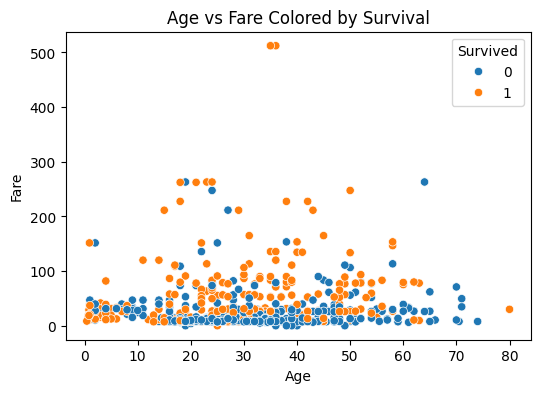

In [13]:
#age vs fare 
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=train_df)
plt.title("Age vs Fare Colored by Survival")
plt.show()